## D212 Clustering Techniques
   Vincent Taylor

### Part I - Research Question

***Reasearch Question (A1)***
The research question I am looking to answer in this analysis is *"Can PCA be used to reduce the dimensionality of this dataset?"*.

***Goal of Data Analysis (A2)***
Using Principal Component Analysis (PCA) for this analysis has the following advantages: It is a more effective way to represent the data is by using PCA to help find and highlight the most significant features in the dataset. By revealing patterns or structures in the data, this reduction in dimensionality can improve computational efficiency and provide new insights into the inherent variability of the data. Although PCA alone might not be able to pinpoint the exact causes of customer churn, it is a useful tool for feature extraction and data visualization that contributes to a better understanding of the structure of the data.


### Part II: Technique Justification

***How does PCA Work***
Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to transform the original features of a dataset into a new set of uncorrelated variables called principal components. The steps to PCA are as follows:

1. Centering the Data: The first step in PCA is to center the data, which is done by deducting each feature's mean from the corresponding data point. By taking this step, the data is guaranteed to be centered around the origin.

2. Compute the Covariance Matrix: The covariance matrix, which illustrates the connections between various features, must be computed next. Information about the collective variation of features is provided by the covariance matrix. It is computed by transposing the centered data matrix and taking the dot product of it.

3. Calculating Eigenvectors and Eigenvalues: PCA then seeks the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues indicate the magnitude of the variance. The eigenvectors are the principal components, and the eigenvalues quantify the amount of variance explained by each principal component.

4. Selecting Principal Components: The process of choosing principal components involves ranking them according to the corresponding eigenvalues. The principal component captures more variance the higher the eigenvalue, typically only the principal components that rank highest and account for most of the variance are kept.

5. Transforming the Data: Lastly the dataset is then transformed into the new space defined by the selected principal components. This results in a reduced-dimensional representation of the data while retaining as much variance as possible.

***Assumption of PCA***
One assumption of PCA is that it assumes that underlying relationships in the data are linear. if relationships in the data are not linear PCA would not be the best choice. 


***Identify Key Variables***

The key variables I will need in this analysis will be as follows. I was able to identify these variables as being key variables in my D206 write-up.

|Variable|Continous/Categorical|
|---|---|
|Tenure|Continuous|
|MonthlyCharge|Continuous|
|Outage_sec_perweek|Continuous|
|bandwidth_gb_year|Continuous|

***Standardize Data***

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "Autopay",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

In [4]:
#Checking for null values
if df.isnull().sum().sum() == 0:
    print("No null values.")
else:
    print("Null values exist!")

No null values.


In [5]:
df_revised = df[['tenure','monthly_charge','outage_sec_perweek','bandwidth_gb_year']]

In [6]:
df_revised.head()

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
0,6.795513,172.455519,7.978323,904.536110
1,1.156681,242.632554,11.699080,800.982766
2,15.754144,159.947583,10.752800,2054.706961
3,17.087227,119.956840,14.913540,2164.579412
4,1.670972,149.948316,8.147417,271.493436


In [7]:
df_revised.describe()

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.526188,172.624816,10.001848,3392.341550
std,26.443063,42.943094,2.976019,2185.294852
min,1.000259,79.978860,0.099747,155.506715
25%,7.917694,139.979239,8.018214,1236.470827
50%,35.430507,167.484700,10.018560,3279.536903
75%,61.479795,200.734725,11.969485,5586.141370
max,71.999280,290.160419,21.207230,7158.981530


In [8]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_revised), columns = df_revised.columns)
scaled_data.head()

,tenure,monthly_charge,outage_sec_perweek,bandwidth_gb_year
0,-1.048746,-0.003943,-0.679978,-1.138487
1,-1.262001,1.630326,0.570331,-1.185876
2,-0.709940,-0.295225,0.252347,-0.612138
3,-0.659524,-1.226521,1.650506,-0.561857
4,-1.242551,-0.528086,-0.623156,-1.428184


In [9]:
#copy of prepared dataset
scaled_data.to_csv('task2_variables.csv',index=False)

In [10]:
# Setting size of PCA analysis (Component Extraction)
model = PCA(n_components=scaled_data.shape[1])
model.fit_transform(scaled_data)

array([[-1.54952471e+00, -4.31809513e-01,  5.16466782e-01,
        -6.46699343e-02],
       [-1.65957322e+00,  1.61676588e+00,  7.83326563e-01,
        -2.17441280e-02],
       [-9.44537518e-01,  1.21411249e-03, -3.61591590e-01,
         8.16259899e-02],
       ...,
       [ 5.83037352e-01, -8.72610623e-01,  7.53910425e-01,
        -9.31488232e-02],
       [ 2.05172741e+00,  1.74607482e+00,  7.65800170e-01,
        -6.52060542e-02],
       [ 1.61331225e+00,  1.10427414e+00,  2.77209710e-01,
        -1.90380110e-02]])

### Loading Matrix

In [11]:
loadings = pd.DataFrame(model.components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4'],
                         index=scaled_data.columns)
loadings

,PC1,PC2,PC3,PC4
tenure,0.705850,-0.046197,-0.039890,-0.705727
monthly_charge,0.040761,0.709435,0.702127,-0.045358
outage_sec_perweek,0.005898,0.703255,-0.710914,0.000047
bandwidth_gb_year,0.707163,-0.000646,0.005274,0.707031


### Scree Plot with explained variance

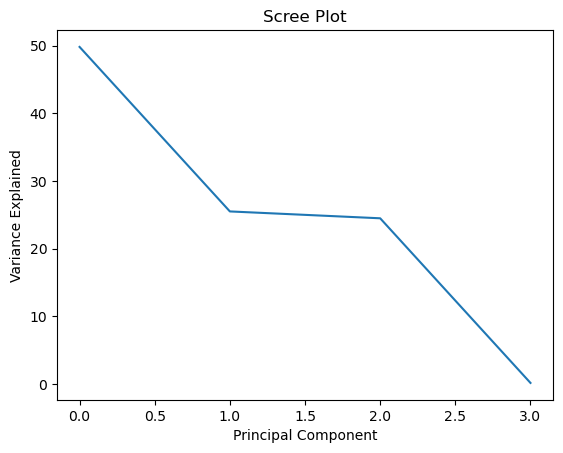

In [12]:
plt.plot(range(0, model.n_components_), model.explained_variance_ratio_*100)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Using the elbow rule and the scree plot the optimal number of principal components is 2, after this point the percent of the variance explained begins to diminish.

In [14]:
#Percentage of variance explained by each principal component identified
pca_var = [i * 100 for i in list(model.explained_variance_ratio_)][0:2]
variance_explained_pca= pd.DataFrame(zip(range(1,5), pca_var)).rename(columns={0:'Principal Component', 
                                                       1:'Percent of Variance'}).set_index('Principal Component')
variance_explained_pca

,Percent of Variance
Principal Component,
1,49.829279
2,25.511994


In [13]:
eigen = [i for i in model.explained_variance_ if i > 1]
eigen

[1.993370482938619, 1.0205818265582447]

Our first two principal components have eigen values > 1

In [19]:
# Extracting the first five eigenvalues and their corresponding percentages
eigenvalues = model.explained_variance_[:3]
pca_var = [eig * 100 / sum(eigenvalues) for eig in eigenvalues]

# Creating a DataFrame for better presentation
variance_explained_eigen = pd.DataFrame(list(zip(range(1, 3), pca_var)),
                                     columns=['Principal Component', 'Percent of Variance']
                                    ).set_index('Principal Component')

variance_explained_eigen

,Percent of Variance
Principal Component,
1,49.909862
2,25.553252


In [16]:
pd.DataFrame(variance_explained_pca.sum(), columns=['Total'])

,Total
Percent of Variance,75.341273


In [17]:
pd.DataFrame(variance_explained_eigen.sum(), columns=['Total'])

,Total
Percent of Variance,75.463114


#### Summary of Analysis

Based on the analysis if we were to decide to use the elbow rule we would keep the first two principal components which would account for 75% of the variance in our data. On the contrary if we decided to use the eigenvalues we would retain our first two principal components which also would account for 75% of the variance in our data. The optimal selection choice would be based on how much we needed to reduce our components. We would have to keep in mind choosing to proceed with the elbow rule method we would have to be comfortable with losing more half of our information as opposed to using eigenvalues.To summarize our analysis we now have the ability to utilize two seperate methods in order to find patterns within our customer dataset.